# 워드엠베딩_워드투벡터
워드투벡터는 자연어처리 기법으로서 지금까지 비교적 덜 알려진 방법입니다.<br>
이 기법이 과연 어떻게 작동하는 지에 대한 사례 [기사](http://www.hani.co.kr/arti/science/technology/900874.html)<br>
가장 큰 특징은 사람처럼 의미를 이해하는 듯이 작동한다는 점일 것입니다.<br>
<br>
우선 워드투벡터에 대한 이론은 [딥 러닝을 이용한 자연어처리 입문](https://wikidocs.net/22644)의 해당 부분을 통해 살펴봅니다.<br>
실습 역시 위 교재의 예를 활용합니다

In [1]:
import urllib.request
from konlpy.tag import Okt
from gensim.models.word2vec import Word2Vec
import pandas as pd
import matplotlib.pyplot as plt

웹에서 데이터를 가져옵니다

In [2]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt", filename="ratings.txt")

('ratings.txt', <http.client.HTTPMessage at 0x1e6b613f608>)

In [3]:
train_data = pd.read_table('ratings.txt') 

In [4]:
train_data[:5] # 상위 5개 출력

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1


In [5]:
print(len(train_data)) # 리뷰 개수 출력

200000


In [6]:
# NULL 값 존재 유무
print(train_data.isnull().values.any())

True


In [7]:
train_data = train_data.dropna(how = 'any') # Null 값이 존재하는 행 제거
print(train_data.isnull().values.any()) # Null 값이 존재하는지 확인

False


In [8]:
print(len(train_data)) # 리뷰 개수 출력

199992


In [9]:
# 정규 표현식을 통한 한글 외 문자 제거
train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")

In [10]:
train_data[:5] # 상위 5개 출력

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,디자인을 배우는 학생으로 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업...,1
2,4655635,폴리스스토리 시리즈는 부터 뉴까지 버릴께 하나도 없음 최고,1
3,9251303,와 연기가 진짜 개쩔구나 지루할거라고 생각했는데 몰입해서 봤다 그래 이런게 진짜 영화지,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화,1


In [11]:
# 불용어 정의
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [12]:
# 형태소 분석기 OKT를 사용한 토큰화 작업 (다소 시간 소요)
okt = Okt()
tokenized_data = []
for sentence in train_data['document']:
    temp_X = okt.morphs(sentence, stem=True) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    tokenized_data.append(temp_X)

리뷰의 최대 길이 : 72
리뷰의 평균 길이 : 10.716703668146726


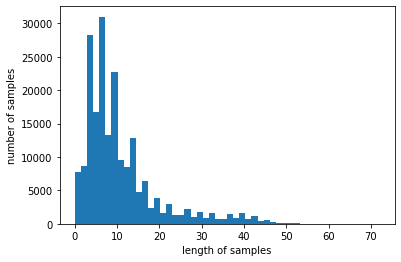

In [13]:
# 리뷰 길이 분포 확인
print('리뷰의 최대 길이 :',max(len(l) for l in tokenized_data))
print('리뷰의 평균 길이 :',sum(map(len, tokenized_data))/len(tokenized_data))
plt.hist([len(s) for s in tokenized_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

## 모델링
실제 작업은 단 한 줄에 불과합니다

In [14]:
from gensim.models import Word2Vec
model = Word2Vec(sentences = tokenized_data, size = 100, window = 5, min_count = 5, workers = 4, sg = 0) #100차원

In [15]:
# 완성된 임베딩 매트릭스의 크기 확인
model.wv.vectors.shape

(16477, 100)

In [19]:
print(model.wv.most_similar("김혜수"))

[('미스캐스팅', 0.8852040767669678), ('조인성', 0.878911554813385), ('배두나', 0.8761531114578247), ('차승원', 0.870524525642395), ('정우성', 0.8682911396026611), ('송강호', 0.8621442317962646), ('이범수', 0.8619571924209595), ('신민아', 0.8605812788009644), ('문채원', 0.8533778190612793), ('류승범', 0.850790798664093)]


In [17]:
print(model.wv.most_similar("히어로"))

[('슬래셔', 0.8642204999923706), ('느와르', 0.8585629463195801), ('호러', 0.848153829574585), ('무비', 0.8367992043495178), ('무협', 0.8282352685928345), ('물', 0.8269758224487305), ('홍콩', 0.8235223293304443), ('물의', 0.8220750689506531), ('헐리우드', 0.8202410936355591), ('블록버스터', 0.8198734521865845)]


### 모델 저장

In [18]:
model.save("naver_mv.model")

## 미리 학습된 모델 로딩
박규병님이 [공개](https://github.com/Kyubyong/wordvectors)해 둔 미리 학습된 모델 [다운로드](https://drive.google.com/file/d/0B0ZXk88koS2KbDhXdWg1Q2RydlU/view) <br>
<br>
다운로드 파일 압축푼 뒤 ko.bin 파일 로드

In [ ]:
import gensim
model = gensim.models.Word2Vec.load('ko.bin 파일의 경로')

In [ ]:
result = model.wv.most_similar("강아지")
print(result)